# Librerias

In [178]:
# import de deep learning

# manejo bbdd
import pandas as pd
import numpy as np
import datetime
import re
import warnings
warnings.filterwarnings('ignore')

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#modelos y evaluación
from statsmodels.discrete.discrete_model import Logit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Procesamiento

In [179]:
churnData = pd.read_csv("Data/Customer-Churn.txt")
data2 = churnData.copy()
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [180]:
churnData.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [181]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [182]:
churnData['TotalCharges'][488]

' '

In [183]:
churnData['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [184]:
churnData['TotalCharges'] = churnData['TotalCharges'].replace(' ', 0)

In [185]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [186]:
columns = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

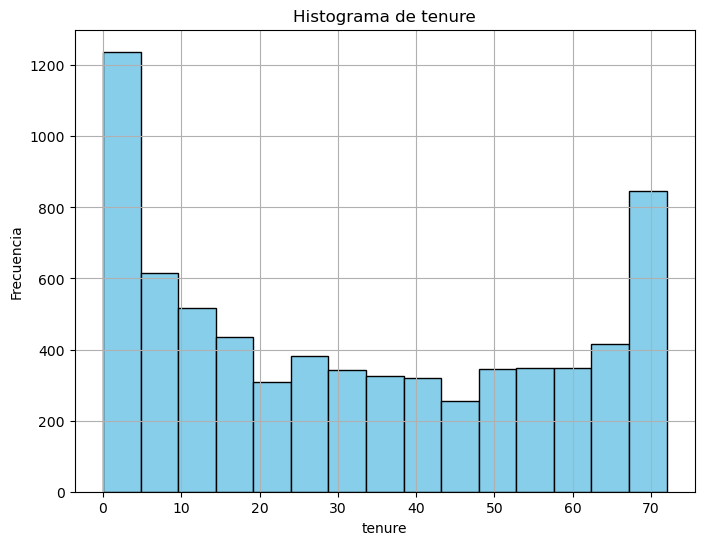

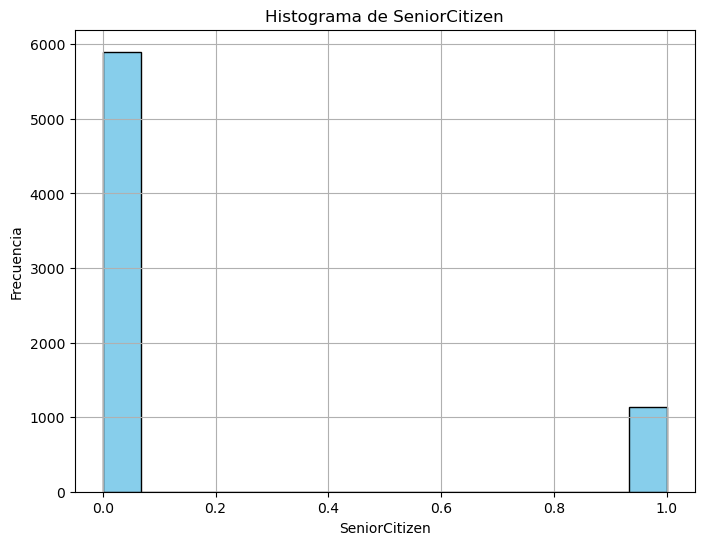

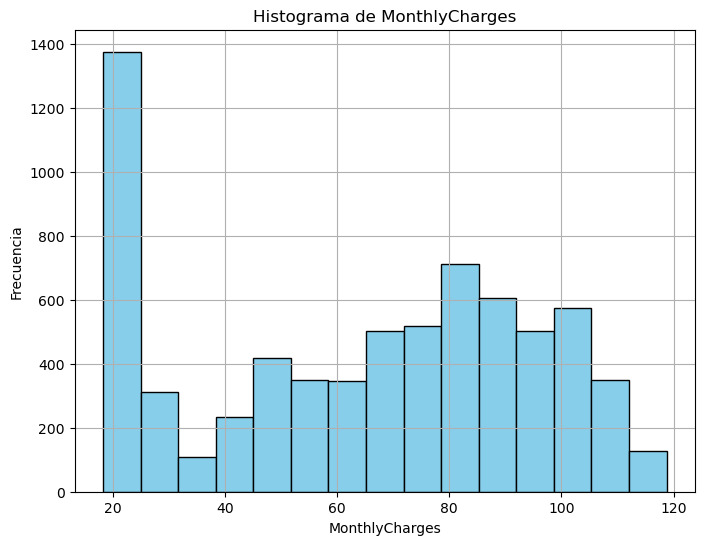

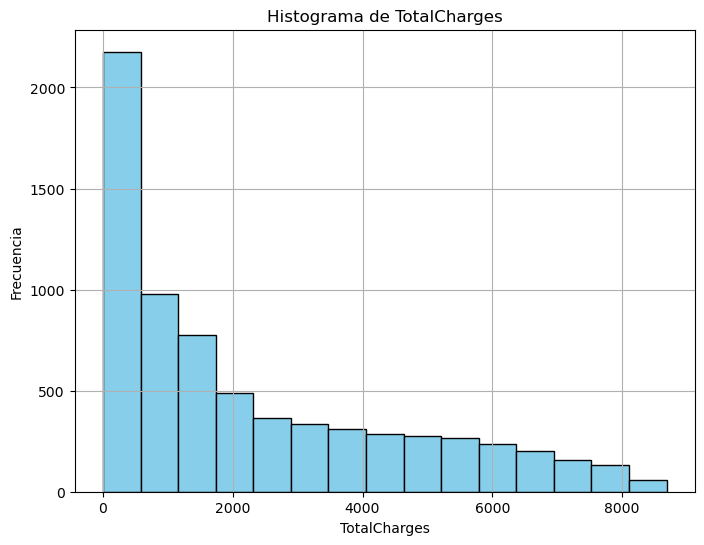

In [187]:
for column in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(churnData[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
    

In [188]:
columns.remove("SeniorCitizen")

In [189]:
def escalar_columnas(df, columns_to_scale):
    scaler = MinMaxScaler()
    X_escalada = pd.DataFrame()
    
    for column in columns_to_scale:
        columna_escalada = scaler.fit_transform(df[[column]])
        X_escalada[column] = columna_escalada.flatten() 
    
    return X_escalada


X_escalada = escalar_columnas(churnData, columns)

X_escalada

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.003437
1,0.472222,0.385075,0.217564
2,0.027778,0.354229,0.012453
3,0.625000,0.239303,0.211951
4,0.027778,0.521891,0.017462
...,...,...,...
7038,0.333333,0.662189,0.229194
7039,1.000000,0.845274,0.847792
7040,0.152778,0.112935,0.039892
7041,0.055556,0.558706,0.035303


In [190]:
churnData["Churn_encoded"] = churnData["Churn"].map({"Yes": 1, "No": 0})
churnData
churnData.drop(columns="Churn", inplace=True)

In [191]:
X_proces = pd.concat([X_escalada, churnData["SeniorCitizen"]], axis=1)
X_proces

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,0.013889,0.115423,0.003437,0
1,0.472222,0.385075,0.217564,0
2,0.027778,0.354229,0.012453,0
3,0.625000,0.239303,0.211951,0
4,0.027778,0.521891,0.017462,0
...,...,...,...,...
7038,0.333333,0.662189,0.229194,0
7039,1.000000,0.845274,0.847792,0
7040,0.152778,0.112935,0.039892,0
7041,0.055556,0.558706,0.035303,1


In [192]:
from sklearn.linear_model import LogisticRegression

Y = churnData["Churn_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X_escalada, Y, test_size=0.2, random_state=42)

model_logistic = LogisticRegression()

model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7984386089425124
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



# Seguimos con el lab :)

In [193]:
churnData.Churn_encoded.value_counts()

Churn_encoded
0    5174
1    1869
Name: count, dtype: int64

In [194]:
# Downsampling

category_0 = churnData[churnData['Churn_encoded'] == 0]
category_1 = churnData[churnData['Churn_encoded'] == 1]

category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

Churn_balance = pd.concat([category_0, category_1], axis=0)
data = Churn_balance.sample(frac=1)
data['Churn_encoded'].value_counts()

(1869, 16)
(1869, 16)


Churn_encoded
0    1869
1    1869
Name: count, dtype: int64

In [195]:
churnData.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn_encoded'],
      dtype='object')

In [196]:
y_train = pd.DataFrame(y_train)
y_train

,Churn_encoded
2142,0
1623,0
6074,1
1362,1
6754,0
...,...
3772,1
5191,0
5226,0
5390,1


In [197]:
Y = churnData["Churn_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X_escalada, Y, test_size=0.2, random_state=42)

model_logistic = LogisticRegression()

model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7984386089425124
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [198]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X_proces, y)
y_sm.value_counts()


Churn
No     5174
Yes    5174
Name: count, dtype: int64

In [199]:
long = set()

for i in X_sm.columns:
    long.add(len(X_sm[i]))

print(long)


{10348}


In [200]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
y_sm_encoded = encoder.fit_transform(y_sm.values.reshape(-1, 1))
y_sm_encoded = pd.DataFrame(y_sm_encoded, columns=encoder.get_feature_names_out(['TARGET_B']))
y_sm_encoded.value_counts()

TARGET_B_Yes
0.0             5174
1.0             5174
Name: count, dtype: int64

In [201]:



X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm_encoded, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.748792270531401
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      1021
         1.0       0.75      0.76      0.75      1049

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred = model_logistic.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.748792270531401
              precision    recall  f1-score   support

          No       0.75      0.74      0.74      1021
         Yes       0.75      0.76      0.75      1049

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



Estaba probando a ver si el modelo reconoce mejor las variables como números o como booleanos y he observado que no hay diferencia :)